## Extract data from followed-by trigger language files
Files with trigger laguage are located in \\\\legal.regn.net\DAY\Shares\Themis\GoldenFTraining\HasTriggerLanguage
<br/>
Files that have no trigger language are located in \\\\legal.regn.net\DAY\Shares\Themis\GoldenFTraining\NoTriggerLanguage
<br/>

In [1]:
import glob
tl_files = glob.glob(r'\\legal.regn.net\DAY\Shares\Themis\GoldenFTraining\HasTriggerLanguage\*.xml')
nt_files = glob.glob(r'\\legal.regn.net\DAY\Shares\Themis\GoldenFTraining\NoTriggerLanguage\*.xml')

### Use regex to find top level paragraph and trigger elements 
It is expensive to create DOM for the entire document as some documents may not have trigger language. The approach is to break the document into top level paragraph text fragments and then locate trigger language in each fragment. If trigger language is located, DOM is created for the paragraph fragment.

In [2]:
import re

trigger = re.compile(r'(<laaa:treatmentTrigger.*</laaa:treatmentTrigger>)')

def find_trigger(s):  
    '''Find trigger elements in given text fragment'''
    return trigger.findall(s)

paragph = re.compile(r'(<lnvxe:text>.*?</lnvxe:text>)')

def find_paragph(s): 
    '''Find top level paragraph elements in given text fragment'''
    return paragph.findall(s)

In [3]:
from Crypto.Cipher import XOR
import base64
import random

enc_key = ''.join(random.choice('abcdef') for i in range(10))

def encrypt(text):
  editors.get(text, 0)
  cipher = XOR.new(enc_key)
  return base64.b64encode(cipher.encrypt(text)).decode()

In [4]:
editor_alias = '@'

editors = {}

def get_editor_alias(editor_id):
  if not editors.get(editor_id, ''):
        global editor_alias
        editor_alias = chr(ord(editor_alias) + 1)
        editors[editor_id] = editor_alias
  return editors[editor_id]

### Parse document using lxml etree

In [5]:
from lxml import etree as ElementTree


def xml_to_tree(fragment):
    '''Return ElementTree for given xml text'''
    namespaces = {'laaa':'http://www.w3.org/laaa', 'lnci':'http://www.w3.org/lnci', 'lnvxe':'http://www.w3.org/lnvxe' }
    ns = ' '.join(('xmlns:{}="{}"'.format(*i) for i in namespaces.items()))
    xml = '<doc {}>{}</doc>'.format(ns, fragment)
    tree = ElementTree.fromstring(xml)
    return tree, namespaces


def find_element_attributes(tag, attr, value, fragment):
    '''
    Return attribute list of the first element based on tag and attribute value.
    '''
    tree, namespaces = xml_to_tree(fragment)
    elements = tree.xpath(".//{}[@{}='{}']".format(tag, attr, value), namespaces=namespaces)
    attributes = elements[0].attrib if elements else []
    return attributes


def embedded_cite(id, fragment):
    '''Return True if given text contains a lnci:cite element with ID attribute = id'''
    attributes = find_element_attributes('lnci:cite', 'ID', id, fragment)
    return True if attributes else False


def find_cite_references(fragment):
    '''Return list of cite id referenced by treatment trigger in given xml text'''
    tree, namespaces = xml_to_tree(fragment)
    elements = tree.findall('.//laaa:treatmentTriggerCiteReference', namespaces=namespaces)
    references = [e.attrib['ID'] for e in elements]
    return references


def find_case_references(fragment):
    '''Return list of case reference id in given xml text'''
    tree, namespaces = xml_to_tree(fragment)
    elements = tree.findall('.//lnci:caseref', namespaces=namespaces)
    references = [e.attrib['ID'] for e in elements]
    return references


def find_cites(fragment):
    '''Return list of cite id in given xml text'''
    tree, namespaces = xml_to_tree(fragment)
    elements = tree.xpath('.//lnci:cite', namespaces=namespaces)
    cites = [e.attrib['ID'] for e in elements]
    return cites


def find_trigger_section(fragment):
    '''
    Return top level laaa:treatmentTrigger xml content as a string
    laaa:treatmentTrigger can have nested laaa:treatmentTrigger elements, return only top level elements.
    Nested laaa:treatmentTrigger has laaa:treatmentTriggerText as parent.
    ElementTree.tostring(...) returns trailing text after the end tag, so use regex to clean the xml string.
    '''
    if not find_trigger(fragment):
        return []
    tree, namespaces = xml_to_tree(fragment)
    elements = tree.xpath('.//laaa:treatmentTrigger', namespaces=namespaces)
    trigger_text_tag = '{http://www.w3.org/laaa}treatmentTriggerText'
    elements = [e for e in elements if e.xpath('..')[0].tag != trigger_text_tag]
    sections = [ElementTree.tostring(e, method='xml', encoding='utf-8').decode() for e in elements]
    sections = [find_trigger(s)[0] for s in sections]
    return sections


def find_trigger_language(fragment):
    '''
    Return all the text embedded within laaa:treatmentTriggerText elements in given laaa:treatmentTrigger xml string 
    '''
    namespaces = {'laaa':'http://www.w3.org/laaa', 'lnci':'http://www.w3.org/lnci', 'lnvxe':'http://www.w3.org/lnvxe' }
    parser = ElementTree.XMLParser(recover=True)
    root = ElementTree.fromstring(fragment, parser)
    elements = root.findall('.//', namespaces)
    trigger_elements = [e for e in elements if e.tag == '{http://www.w3.org/laaa}treatmentTriggerText']
    language = ''.join(trigger_elements[0].itertext())
    group_id = root.attrib['groupIdentifier']
    fragment_id = root.attrib['fragmentNumber']
    editor_id = root.attrib['editorId']
    return language, group_id, fragment_id, get_editor_alias(editor_id)


def get_text(fragment):
    '''Return all the text within given xml string'''
    tree, namespaces = xml_to_tree(fragment)
    return ''.join(tree.itertext())

<table style="float:left">
        <tr>
            <th style="text-align:left;">Name</td>
            <th style="text-align:left;">Description</td>
        </tr>
        <tr>
            <td style="text-align:left;">para_element</td>
            <td style="text-align:left;">xml with root element &lt;lnvxe:text&gt;</td>
        </tr>
        <tr>
            <td style="text-align:left;">para_text</td>
            <td style="text-align:left;">paragraph text</td>
        </tr>
        <tr>
            <td style="text-align:left;">trgr_element</td>
            <td style="text-align:left;">xml with root element &lt;laaa:treatmentTrigger&gt;</td>
        </tr>
        <tr>
            <td style="text-align:left;">trgr_language</td>
            <td style="text-align:left;">text contained in element &lt;laaa:treatmentTrigger&gt;</td>
        </tr>
        <tr>
            <td style="text-align:left;">cnt_cite_in_para</td>
            <td style="text-align:left;">number of &lt;lnci:cite&gt; elements within para_element</td>
        </tr>
        <tr>
            <td style="text-align:left;">cnt_f_letter_cite_in_para</td>
            <td style="text-align:left;">number of &lt;lnci:cite&gt; elements within para_element that have letter f</td>
        </tr>
        <tr>
            <td style="text-align:left;">cnt_non_f_letter_cite_in_para</td>
            <td style="text-align:left;">number of &lt;lnci:cite&gt; elements within para_element that have treatment letter other than f</td>
        </tr>        
        <tr>
            <td style="text-align:left;">cnt_f_letter_cite_referenced</td>
            <td style="text-align:left;">number of &lt;laaa:treatmentTriggerCiteReference&gt; elements within &lt;laaa:treatmentTrigger&gt;</td>
        </tr>
        <tr>
            <td style="text-align:left;">cnt_f_letter_cite_referenced_in_para</td>
            <td style="text-align:left;">number of &lt;lnci:cite&gt; elements within para_element that have been referenced using &lt;laaa:treatmentTriggerCiteReference&gt; elements</td>
        </tr>
        <tr>
            <td style="text-align:left;">cite_reference</td>
            <td style="text-align:left;">cite reference dictionary key: Cite ID, value: [<letter>]</td>
        </tr>

</table>




In [6]:
import os
import pandas as pd  


def get_cite_references(trgr):
    '''
    Return dictionary of cite references, count of embedded cites, count of external cites 
    in given trigger section.
    example dictionary of cite references:
    {'I5VW15DW2N1R7H0JT0000400':'external', 'I5W19G8R1T51580030000400':'embedded'}
    '''
    cite_references = find_cite_references(trgr)
    cite_reference_dict = {}
    cite_type_dict = {}
    for cite_id in cite_references:
        cite_type = 'embedded' if embedded_cite(cite_id, trgr) else 'external'
        cite_type_dict[cite_type] = cite_type_dict.get(cite_type, 0) + 1
        cite_reference_dict[cite_id] = cite_type
    embedded_count = cite_type_dict.get('embedded', 0)
    external_count = cite_type_dict.get('external', 0)
    return cite_reference_dict, embedded_count, external_count


trigger_language_dict_metadata = ['para_text', 
                                  'trgr_element', 
                                  'trgr_language', 
                                  'group_id', 
                                  'fragment_id', 
                                  'editor_id', 
                                  'cnt_cite_in_para', 
                                  'cite_reference', 
                                  'cnt_cite_referenced',  
                                  'cnt_cite_referenced_in_para',
                                  'cnt_cite_embedded', 
                                  'cnt_cite_external']

def make_trigger_language_dict(filename, para, para_id, **kwargs):
    '''Utility function to make a dictionary object for trigger language'''
    trigger_language_dict = {'filename': filename, 'para_element': para, 'para_id': para_id}
    for key, value in kwargs.items():
        if key not in trigger_language_dict_metadata:
            raise ValueError('unknown key {}'.format(key))
        trigger_language_dict[key] = value
    return trigger_language_dict


trigger_language_list = []


def process_trigger_sections(file, para, para_id, trgrs):
    '''
    Create dictionary for each section that has trigger language
    and append to list
    '''
    for trgr in trgrs:   
        language, group_id, fragment_id, editor_id = find_trigger_language(trgr)
        cite_reference_dict, embedded_count, external_count = get_cite_references(trgr)
        cites_referenced_in_trigger = list(cite_reference_dict.keys())
        cites_in_para = find_cites(para)
        cnt_cite_referenced_in_para = len(set(cites_in_para) & set(cites_referenced_in_trigger))
        cite_count = len(cites_in_para)
        para_text = get_text(para)
        trigger_language_dict = make_trigger_language_dict(file, para, para_id,
            para_text=para_text, 
            trgr_element=trgr, 
            trgr_language=language, 
            group_id=group_id, 
            fragment_id=fragment_id, 
            editor_id=editor_id,                                                           
            cite_reference=cite_reference_dict,
            cnt_cite_embedded=embedded_count,
            cnt_cite_external=external_count,
            cnt_cite_referenced=embedded_count+external_count,
            cnt_cite_referenced_in_para=cnt_cite_referenced_in_para,                                               
            cnt_cite_in_para=cite_count
        )
        trigger_language_list.append(trigger_language_dict)

        
def process_notrigger_para(file, para, para_id):
    '''
    Create dictionary when no no trigger language is present
    and append to list
    '''
    cite_count = len(find_cites(para))
    para_text = get_text(para)
    trigger_language_dict = make_trigger_language_dict(file, para, para_id,
        para_text=para_text,                                               
        trgr_element='', 
        trgr_language='', 
        group_id='', 
        fragment_id='', 
        editor_id='',             
        cite_reference={},
        cnt_cite_embedded=0,
        cnt_cite_external=0,
        cnt_cite_referenced=0,
        cnt_cite_referenced_in_para=0,
        cnt_cite_in_para=cite_count                                                                                                   
    )
    trigger_language_list.append(trigger_language_dict)
    
    
def extract_trigger_language(file, content):
    '''Find trigger language in given content and process it'''
    for index, para in enumerate(find_paragph(content)):
        trgrs = find_trigger_section(para)
        if trgrs:
            process_trigger_sections(file, para, index, trgrs)
        else:
            process_notrigger_para(file, para, index)

for file in tl_files:
    f = open(file, "r", encoding="utf-8")
    content = f.read()
    try:
        extract_trigger_language(os.path.basename(f.name), content)
        print(os.path.basename(f.name), 'xml ok', sep=':')
    except Exception as e:
        print(os.path.basename(f.name), 'xml error', e, sep=':')
    f.close()

BL00116347.XML:xml ok
BL00211658.XML:xml ok
BL00267826.XML:xml ok
BL00915946.XML:xml ok
BL01194808.XML:xml ok
BL01258106.XML:xml ok
BL01258142.XML:xml ok
BL01258203.XML:xml ok
BL01262550.XML:xml ok
BL01310123.XML:xml ok
BL01386915.XML:xml ok
BL01408914.XML:xml ok
BL01415548.XML:xml ok
BL01424111.XML:xml ok
BL01428689.XML:xml ok
BL01430546.XML:xml ok
BL01430577.XML:xml ok
BL01430637.XML:xml ok
BL01442880.XML:xml ok
BL01477755.XML:xml ok
BL01480982.XML:xml ok
BL01496348.XML:xml ok
BL01496908.XML:xml ok
BL01505881.XML:xml ok
BL01516274.XML:xml ok
BL01516294.XML:xml ok
BL01517770.XML:xml ok
BL01521475.XML:xml ok
BL01565589.XML:xml ok
BL01601333.XML:xml ok
BL01606670.XML:xml ok
BL01612883.XML:xml ok
BL01616462.XML:xml ok
BL01623459.XML:xml ok
BL01637917.XML:xml ok
BL01649135.XML:xml ok
BL01649136.XML:xml ok
BL01652458.XML:xml ok
BL01652508.XML:xml ok
BL01664387.XML:xml ok
BL01666283.XML:xml ok
BL01667541.XML:xml ok
BL01668506.XML:xml ok
BL01670195.XML:xml ok
BL01670210.XML:xml ok
BL01671094

BL03554084.XML:xml ok
BL03562067.XML:xml ok
BL03565229.XML:xml ok
BL03569511.XML:xml ok
BL03580493.XML:xml ok
BL03583379.XML:xml ok
BL03583493.XML:xml ok
BL03583510.XML:xml ok
BL03583670.XML:xml ok
BL03586113.XML:xml ok
BL03586132.XML:xml ok
BL03589602.XML:xml ok
BL03589657.XML:xml ok
BL03589665.XML:xml ok
BL03589666.XML:xml ok
BL03589891.XML:xml ok
BL03595685.XML:xml ok
BL03597851.XML:xml ok
BL03597902.XML:xml ok
BL03598250.XML:xml ok
BL03598896.XML:xml ok
BL03603066.XML:xml ok
BL03608769.XML:xml ok
BL03622322.XML:xml ok
BL03632269.XML:xml ok
BL03634057.XML:xml ok
BL03637185.XML:xml ok
BL03638350.XML:xml ok
BL03643642.XML:xml ok
BL03644502.XML:xml ok
BL03645022.XML:xml ok
BL03645115.XML:xml ok
BL03645290.XML:xml ok
BL03645375.XML:xml ok
BL03645795.XML:xml ok
BL03645821.XML:xml ok
BL03648792.XML:xml ok
BL03648801.XML:xml ok
BL03652542.XML:xml ok
BL03652555.XML:xml ok
BL03652557.XML:xml ok
BL03652566.XML:xml ok
BL03652601.XML:xml ok
BL03652635.XML:xml ok
BL03652638.XML:xml ok
BL03653589

BL06516808.XML:xml ok
BL06522397.XML:xml ok
BL06553936.XML:xml ok
BL06553940.XML:xml ok
BL06555018.XML:xml ok
BL06557412.XML:xml ok
BL06557699.XML:xml ok
BL06557731.XML:xml ok
BL06572676.XML:xml ok
BL06574447.XML:xml ok
BL06582539.XML:xml ok
BL06620105.XML:xml ok
BL06662816.XML:xml ok
BL06678484.XML:xml ok
BL06678489.XML:xml ok
BL06679690.XML:xml ok
BL06684721.XML:xml ok
BL06684727.XML:xml ok
BL06684729.XML:xml ok
BL06686487.XML:xml ok
BL06688744.XML:xml ok
BL06688818.XML:xml ok
BL06690212.XML:xml ok
BL06693681.XML:xml ok
BL06694703.XML:xml ok
BL06694715.XML:xml ok
BL06694722.XML:xml ok
BL06694745.XML:xml ok
BL06694749.XML:xml ok
BL06695028.XML:xml ok
BL06697901.XML:xml ok
BL06697919.XML:xml ok
BL06697925.XML:xml ok
BL06701769.XML:xml ok
BL06732669.XML:xml ok
BL06734619.XML:xml ok
BL06734781.XML:xml ok
BL06735265.XML:xml ok
BL06735375.XML:xml ok
BL06739570.XML:xml ok
BL06763810.XML:xml ok
BL06768451.XML:xml ok
BL06769908.XML:xml ok
BL06771227.XML:xml ok
BL06773544.XML:xml ok
BL06774233

### Analyze trigger language using a DataFrame

In [7]:
trigger_language_rows = []

def convert_trigger_language():
    for item in trigger_language_list:        
        row = [item['filename'], 
               item['para_id'], 
               item['para_element'], 
               item['para_text'], 
               item['cnt_cite_in_para'], 
               item['trgr_element'],                
               item['trgr_language'], 
               item['group_id'], 
               item['fragment_id'], 
               item['editor_id'],                
               item['cnt_cite_referenced'], 
               item['cnt_cite_embedded'], 
               item['cnt_cite_external'], 
               item['cnt_cite_referenced_in_para'], 
               item['cite_reference']]
        trigger_language_rows.append(row)

convert_trigger_language()

columns = ['filename', 
           'para_id', 
           'para_element', 
           'para_text', 
           'cnt_cite_in_para', 
           'trgr_element', 
           'trgr_language', 
           'group_id', 
           'fragment_id', 
           'editor_id', 
           'cnt_cite_referenced',
           'cnt_cite_embedded', 
           'cnt_cite_external', 
           'cnt_cite_referenced_in_para',
           'cite_reference']

df = pd.DataFrame(trigger_language_rows, columns = columns, dtype = int) 
df 

filename  para_id  \
0                                       BL00116347.XML        0   
1                                       BL00116347.XML        1   
2                                       BL00116347.XML        2   
3                                       BL00116347.XML        3   
4                                       BL00116347.XML        4   
5                                       BL00116347.XML        5   
6                                       BL00116347.XML        6   
7                                       BL00116347.XML        7   
8                                       BL00116347.XML        8   
9                                       BL00116347.XML        9   
10                                      BL00116347.XML       10   
11                                      BL00116347.XML       11   
12                                      BL00116347.XML       12   
13                                      BL00116347.XML       13   
14                                      BL00116347.XML       14   
15                                      BL00116347.XML       15   
16                                      BL00116347.XML       16   
17                                      BL00116347.XML       17   
18                                      BL00116347.XML       18   
19                                      BL00116347.XML       19   
20                                      BL00116347.XML       20   
21                                      BL00116347.XML       21   
22                                      BL00116347.XML       22   
23                                      BL00116347.XML       23   
24                                      BL00116347.XML       24   
25                                      BL00116347.XML       25   
26                                      BL00116347.XML       26   
27                                      BL00116347.XML       27   
28                                      BL00116347.XML       28   
29                                      BL00211658.XML        0   
...                                                ...      ...   
54122  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       61   
54123  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       62   
54124  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       63   
54125  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       64   
54126  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       65   
54127  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       66   
54128  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       67   
54129  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       68   
54130  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       69   
54131  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       70   
54132  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       71   
54133  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       72   
54134  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       72   
54135  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       73   
54136  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       74   
54137  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       75   
54138  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       76   
54139  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       77   
54140  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       78   
54141  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       79   
54142  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       80   
54143  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       81   
54144  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       82   
54145  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       83   
54146  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       84   
54147  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       85   
54148  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       86   
54149  BR28090_5W12-SHK1-F4W2-60BP-00000-00_MERGED.XML       87   
54150  BR28090_5W12-SHK1-F

In [8]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

x = ['Treatment', 'No Treatment']
documents = [len(tl_files), len(nt_files)]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, documents, color='orange')
plt.ylabel("Number of Documents")
plt.title("Documents")

plt.xticks(x_pos, x)

plt.show()

<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Distribution of Paragraphs with Trigger Language ')

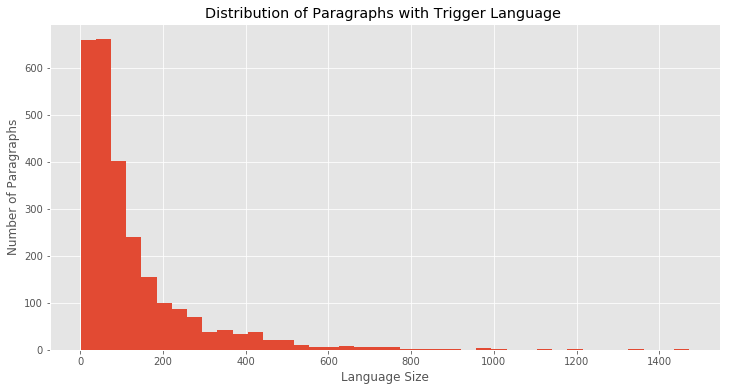

In [9]:
trgr_data = pd.DataFrame(df.query('trgr_language != ""'))
trgr_data["language_size"] = trgr_data["trgr_language"].str.len()
hist = trgr_data.hist(column="language_size", bins=40, figsize=(12,6))
hist[0][0].set_ylabel('Number of Paragraphs')
hist[0][0].set_xlabel('Language Size')
hist[0][0].set_title('Distribution of Paragraphs with Trigger Language ')

Text(0.5, 1.0, 'Distribution of Trigger Language Paragraph Groups ')

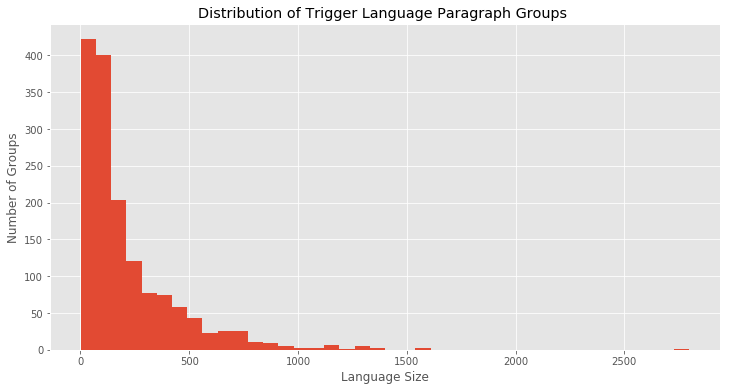

In [11]:
trgr_data = pd.DataFrame(df.query('trgr_language != ""'))
trgr_data["language_size"] = trgr_data["trgr_language"].str.len()
size_data = trgr_data.groupby(['group_id'])['language_size'].agg('sum').to_frame('language_size')
hist = size_data.hist(column="language_size", bins=40, figsize=(12,6))
hist[0][0].set_ylabel('Number of Groups')
hist[0][0].set_xlabel('Language Size')
hist[0][0].set_title('Distribution of Trigger Language Paragraph Groups ')

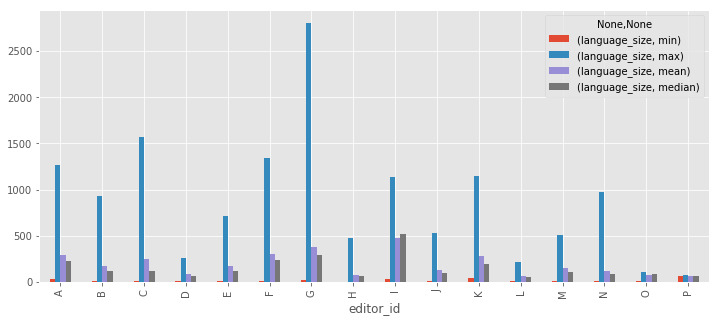

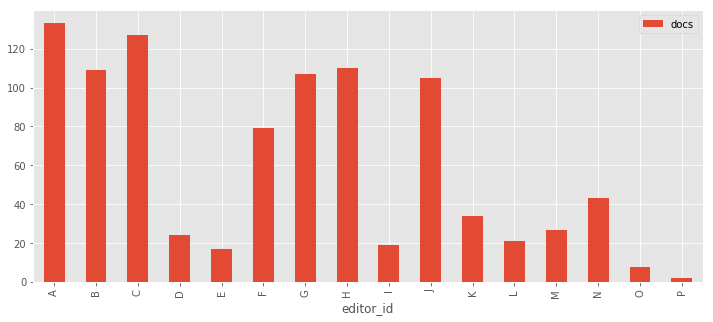

In [12]:
trgr_data = pd.DataFrame(df.query('trgr_language != ""'))
trgr_data["language_size"] = trgr_data["trgr_language"].str.len()
lang_data = trgr_data[['editor_id','language_size', 'group_id']]
size_data = lang_data.groupby(['group_id'])['language_size'].agg('sum').to_frame('language_size')
editor_data = lang_data.groupby(['group_id'])['editor_id'].agg('max').to_frame('editor_id')
editor_data['language_size'] = size_data['language_size']
editor_data = editor_data.reset_index().drop(columns=['group_id']).groupby(['editor_id']).agg(['min','max', 'mean', 'median'])
editor_data.plot.bar(figsize=(12,5))
doc_data = trgr_data.groupby(['filename'])['editor_id'].agg('max').to_frame().groupby(['editor_id']).size().to_frame('docs')
doc_data.plot.bar(figsize=(12,5))

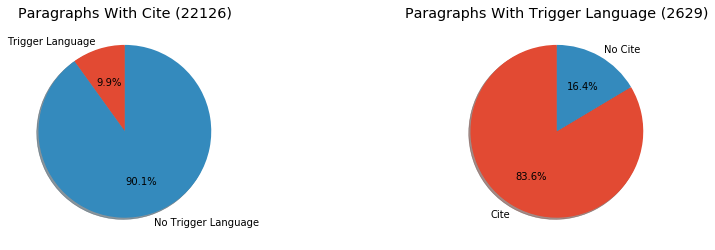

In [13]:
import matplotlib.pyplot as plt

cnt_para_with_trgr_lang = df.query('trgr_language != ""')['para_id'].count()
cnt_para_with_cite_and_no_trgr_lang = df.query('cnt_cite_in_para > 0 and trgr_language == ""')['para_id'].count()
cnt_para_with_no_cite_and_trigger_lang = df.query('cnt_cite_in_para == 0 and trgr_language != ""')['para_id'].count()
cnt_para_with_cite_and_trigger_lang = df.query('cnt_cite_in_para > 0 and trgr_language != ""')['para_id'].count()

fig = plt.figure(figsize=(12, 6))

labels = 'Trigger Language', 'No Trigger Language'
sizes = [cnt_para_with_cite_and_trigger_lang, cnt_para_with_cite_and_no_trgr_lang]
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Paragraphs With Cite ({})'.format(sum(sizes)))

labels = 'Cite', 'No Cite'
sizes = [cnt_para_with_cite_and_trigger_lang, cnt_para_with_no_cite_and_trigger_lang]
ax2 = fig.add_axes([.5, 0, .5, .5], aspect=1)
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title('Paragraphs With Trigger Language ({})'.format(sum(sizes)))

plt.show()

In [14]:
df.query('cnt_cite_in_para == 0 and trgr_language != ""')

filename  para_id  \
3      BL00116347.XML        3   
703    BL01408914.XML      146   
1022   BL01430577.XML       25   
1025   BL01430577.XML       28   
1055   BL01430637.XML       17   
1201   BL01442880.XML      142   
1298   BL01480982.XML       29   
1314   BL01480982.XML       45   
1549   BL01505881.XML      153   
1552   BL01505881.XML      156   
1642   BL01516294.XML       35   
1643   BL01516294.XML       35   
2420   BL01666283.XML        4   
2421   BL01666283.XML        4   
2538   BL01670195.XML       26   
2837   BL01671094.XML       77   
3074   BL01689048.XML        5   
3161   BL01734612.XML       51   
3243   BL01756830.XML       35   
3391   BL01785780.XML       56   
3802   BL02008383.XML       18   
3803   BL02008383.XML       18   
3875   BL02017160.XML       28   
3876   BL02017160.XML       28   
3894   BL02027903.XML       11   
3923   BL02053790.XML        4   
4292   BL02077297.XML       58   
4514   BL02149393.XML       94   
4636   BL02157240.XML       91   
4641   BL02157240.XML       96   
...               ...      ...   
51333  BL91699410.XML       25   
51955  BL93936352.XML       16   
52152  BL94992450.XML       41   
52154  BL94992450.XML       43   
52169  BL94992450.XML       58   
52248  BL95152221.XML       26   
52828  BL97635579.XML        8   
53020  BL98369768.XML      118   
53021  BL98369768.XML      119   
53024  BL98369768.XML      122   
53073  BL98370364.XML       16   
53074  BL98370364.XML       16   
53396  BL98378336.XML      298   
53397  BL98378336.XML      298   
53398  BL98378336.XML      298   
53427  BL98378336.XML      327   
53429  BL98378336.XML      329   
53430  BL98378336.XML      329   
53431  BL98378336.XML      329   
53438  BL98378336.XML      336   
53468  BL98378336.XML      366   
53474  BL98378336.XML      372   
53481  BL98378336.XML      379   
53484  BL98378336.XML      382   
53487  BL98378336.XML      385   
53520  BL98379122.XML       11   
53543  BL98385310.XML        8   
53641  BL98665476.XML       35   
53842  BL99219994.XML       12   
53886  BL99676814.XML       15   

                                            para_element  \
3      <lnvxe:text>The Court held a hearing on Februa...   
703    <lnvxe:text><page count="44" resourcekey="urn:...   
1022   <lnvxe:text><laaa:treatmentTrigger createdDate...   
1025   <lnvxe:text><laaa:treatmentTrigger createdDate...   
1055   <lnvxe:text><laaa:treatmentTrigger createdDate...   
1201   <lnvxe:text>We have tried to pull the interpre...   
1298   <lnvxe:text><laaa:treatmentTrigger createdDate...   
1314   <lnvxe:text>For the above reasons, we hold tha...   
1549   <lnvxe:text>Here, Ms. Perez has the requisite ...   
1552   <lnvxe:text>The three legal organizations repr...   
1642   <lnvxe:text>P24 <laaa:treatmentTrigger created...   
1643   <lnvxe:text>P24 <laaa:treatmentTrigger created...   
2420   <lnvxe:text>While t<laaa:treatmentTrigger crea...   
2421   <lnvxe:text>While t<laaa:treatmentTrigger crea...   
2538   <lnvxe:text><laaa:treatmentTrigger createdDate...   
2837   <lnvxe:text><laaa:treatmentTrigger createdDate...   
3074   <lnvxe:text><laaa:treatmentTrigger createdDate...   
3161   <lnvxe:text><page count="P32" resourcekey="urn...   
3243   <lnvxe:text>Second, in support of their argume...   
3391   <lnvxe:text><page count="P34" medianeutralrsc=...   
3802   <lnvxe:text><page count="P11" resourcekey="urn...   
3803   <lnvxe:text><page count="P11" resourcekey="urn...   
3875   <lnvxe:text><laaa:treatmentTrigger createdDate...   
3876   <lnvxe:text><laaa:treatmentTrigger createdDate...   
3894   <lnvxe:text>Instead, Olli attempts to rebut fa...   
3923   <lnvxe:text><laaa:treatmentTrigger createdDate...   
4292   <lnvxe:text><laaa:treatmentTrigger createdDate...   
4514   <lnvxe:text><laaa:treatmentTrigger createdDate...   
4636   <lnvxe:text><laaa:treatmentTrigger createdDate...   
4641   <lnvxe:text>Defendants <laaa:treatmentTrigger ...   
...                                         

### Ditribution of Followed By Cites in a Document
Some documents have more than 1 citations that are treated with letter 'f'. For example BL01505881.XML has 4 citations that have been followed:

- Mielo v. Steak &apos;n Shake Operations, Inc.
- Hayes v. Wal-Mart Stores, Inc.
- Marcus v. BMW of N. Am., LLC
- In re Modafinil Antitrust Litig.

Text(0.5, 1.0, 'Distribution of FollowedBy Cites ')

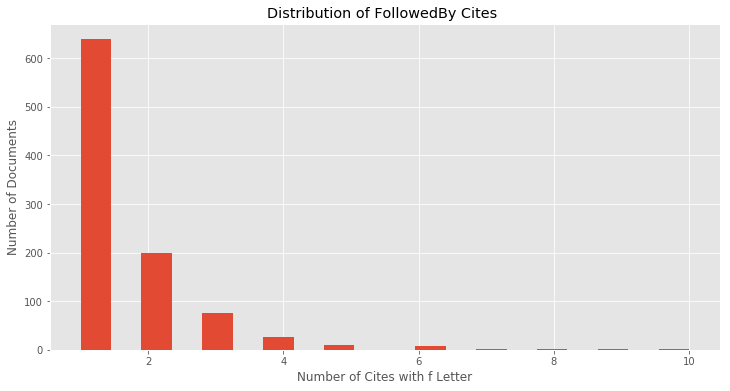

In [15]:
df_group = df.query('trgr_language != ""').groupby(['filename'])['group_id'].agg('nunique').to_frame('cites_with_f_letter')
hist = df_group.hist(column="cites_with_f_letter", bins=20, figsize=(12,6))
hist[0][0].set_ylabel('Number of Documents')
hist[0][0].set_xlabel('Number of Cites with f Letter')
hist[0][0].set_title('Distribution of FollowedBy Cites ')

In [19]:
df_group = df.query('trgr_language != ""').groupby(['filename'])['group_id'].agg('nunique')
df_group

filename
BL00116347.XML                                     1
BL00211658.XML                                     1
BL00267826.XML                                     1
BL00915946.XML                                     1
BL01194808.XML                                     1
BL01258106.XML                                     1
BL01258142.XML                                     1
BL01258203.XML                                     2
BL01262550.XML                                     1
BL01310123.XML                                     1
BL01386915.XML                                     3
BL01408914.XML                                     1
BL01415548.XML                                     1
BL01424111.XML                                     1
BL01428689.XML                                     2
BL01430546.XML                                     1
BL01430577.XML                                     2
BL01430637.XML                                     1
BL01442880.XML                       

Text(0.5, 1.0, 'Distribution of Triger Language Groups')

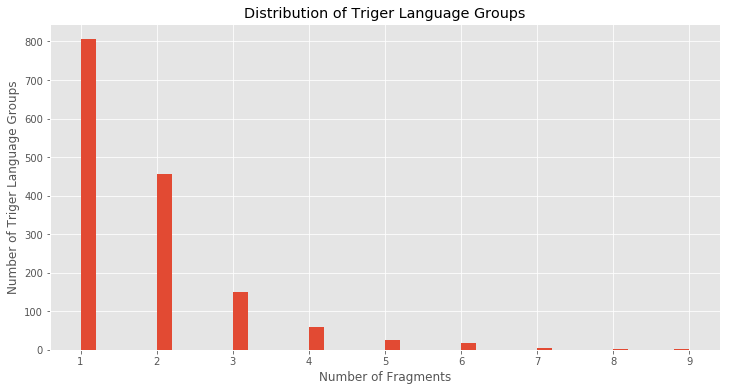

In [16]:
df_group = df.query('trgr_language != ""').groupby(['group_id'])['fragment_id'].agg('max').to_frame('fragment_count').astype('float64')
hist = df_group.hist(column="fragment_count", bins=40, figsize=(12,6))
hist[0][0].set_ylabel('Number of Triger Language Groups')
hist[0][0].set_xlabel('Number of Fragments')
hist[0][0].set_title('Distribution of Triger Language Groups')